<a href="https://colab.research.google.com/github/manju2021/cxr_images/blob/master/CXR_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install plot_utils

In [ ]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
#import plot_utils
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython import display
print('Tensorflow version:', tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense,BatchNormalization,Reshape,Conv2DTranspose,Conv2D,LeakyReLU,Dropout,Flatten,ReLU

Tensorflow version: 2.8.0


In [ ]:
#Code for mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install --upgrade tensorflow
#set the path to the main dir
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/cxr_v1')


In [ ]:
#clone the dataset from the github repository
#! git clone https://github.com/education454/datasets.git
# Path for augmented dataset - 
#! git clone https://github.com/manju2021/cxr_images.git
# Path for dataset1 

In [ ]:
main_dir= '/content/drive/MyDrive/Colab Notebooks/cxr_v1'

In [ ]:
New_train_covid_names=os.listdir(main_dir)
print(New_train_covid_names[1:10])


['COVID-1003.png', 'COVID-1003 - Copy.png', 'COVID-1005.png', 'COVID-1009 - Copy.png', 'COVID-101 - Copy.png', 'COVID-1011.png', 'COVID-1014.png', 'COVID-1023.png', 'COVID-1025.png']


In [ ]:
#print the total no of images present in each dir
print("Total images present in the training set :",len(New_train_covid_names))
#print("Total images present in the test set :",len(test_covid_names+test_normal_names))

Total images present in the training set : 597


['/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1000 - Copy.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1003.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1003 - Copy.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1005.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1009 - Copy.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-101 - Copy.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1011.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1014.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1023.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1025.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1024 - Copy.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1026.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1027.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-103 - Copy.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/COVID-1030.png',

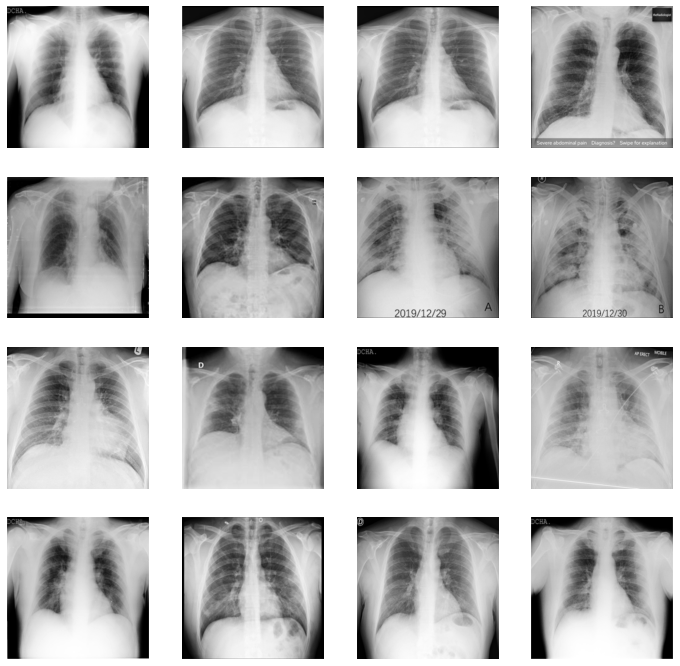

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows=4
cols=4
#set the figure size
fig=plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic=[os.path.join(main_dir,filename) for filename in New_train_covid_names[0:16]]
#normal_pic=[os.path.join(train_normal_dir,filename) for filename in new_train_normal_names[0:8]]
#print the list
print(covid_pic)
#print(normal_pic)
#merge the covid and normal list
#merged_list=covid_pic+normal_pic
merged_list=covid_pic
for i,img_path in enumerate(merged_list):
  #data=img_path.split('/',9)[6]
  sp=plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  #sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

In [ ]:
##Keras model
dataset = keras.preprocessing.image_dataset_from_directory(
    main_dir, label_mode=None, image_size=(256,256), batch_size=64,shuffle=True
)
dataset = dataset.map(lambda x: x / 255)

Found 507 files belonging to 1 classes.


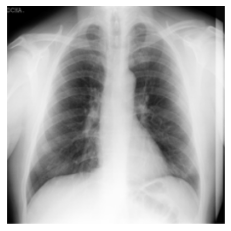

In [ ]:
for x in dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[5])
    break

In [ ]:
dataset

<MapDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>

In [ ]:
discriminator = keras.Sequential()

discriminator.add(Conv2D(32,(5,5),(2,2),padding='same',input_shape=[256,256
                                                                  ,3]))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(64,(5,5),(2,2),padding='same'))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(128,(5,5),(2,2),padding='same'))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(256,(5,5),(2,2),padding='same'))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(512,(5,5),(2,2),padding='same'))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(1024,(5,5),(2,2),padding='same'))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Flatten())
#discriminator.add(Dropout(0.3))

discriminator.add(Dense(1,activation='sigmoid'))
    
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)      0         
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                        

In [ ]:
latent_dim=50

def generator_model():

    generator = keras.Sequential()

    # Random noise to 4x4x512 image
    generator.add(Dense(4*4*1024, input_shape=[latent_dim]))
    #  Next, add a reshape layer to the network to reshape the tensor from the 
    # last layer to a tensor of a shape of (4, 4, 512):
    generator.add(Reshape([4,4,1024]))

    generator.add(Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"))
    # BatchNormalization is added to the model after the hidden layer, but before the activation, such as LeakyReLU.
    generator.add(BatchNormalization())
    generator.add(ReLU())


    generator.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
    # BatchNormalization is added to the model after the hidden layer, but before the activation, such as LeakyReLU.
    generator.add(BatchNormalization())
    generator.add(ReLU())

    generator.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
    generator.add(BatchNormalization())
    generator.add(ReLU())
    
    generator.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"))
    generator.add(BatchNormalization())
    generator.add(ReLU())
    
    generator.add(Conv2DTranspose(32, kernel_size=4, strides=2, padding="same"))
    generator.add(BatchNormalization())
    generator.add(ReLU())
    
    generator.add(Conv2DTranspose(3, kernel_size=4, strides=2, padding="same",
                                  activation='sigmoid'))

    return generator

generator=generator_model()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16384)             835584    
                                                                 
 reshape (Reshape)           (None, 4, 4, 1024)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 512)        8389120   
 nspose)                                                         
                                                                 
 batch_normalization_6 (Batc  (None, 8, 8, 512)        2048      
 hNormalization)                                                 
                                                                 
 re_lu (ReLU)                (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 256)     

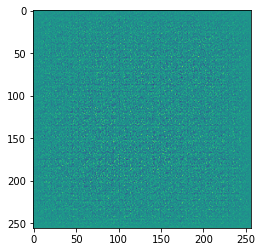

In [ ]:
# First create a random noise 
noise = tf.random.normal([1,50])
generated_image = generator(noise, training=False)
# print(generated_image)
plt.imshow(generated_image[0, :, :, 0])

# It is just plain noise. But, the fact that it can create an image from a random noise array proves the model's power.

In [ ]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.g_optimizer,
                                 discriminator_optimizer=self.d_optimizer,
                                 generator=self.generator,
                                 discriminator=self.discriminator)

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

In [ ]:
#Creating a new directory and change that as current directory
os.mkdir('/content/drive/MyDrive/Colab Notebooks/cxr1_exp2_v3')
os.mkdir('/content/drive/MyDrive/Colab Notebooks/cxr1_exp2_v3/ckpoint')
os.mkdir('/content/drive/MyDrive/Colab Notebooks/cxr1_exp2_v3/1000_epoch')
os.chdir('/content/drive/MyDrive/Colab Notebooks/cxr1_exp2_v3')


In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=latent_dim):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        checkpoint_dir = '/content/drive/MyDrive/Colab Notebooks/cxr1_exp2_v3/ckpoint'
        checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
        checkpoint = tf.train.Checkpoint(generator_optimizer=self.model.g_optimizer,
                                 discriminator_optimizer=self.model.d_optimizer,
                                 generator=self.model.generator,
                                 discriminator=self.model.discriminator)
        
        
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        self.model.checkpoint=checkpoint

        if (epoch + 1) % 2 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        if epoch == 1499:
            os.chdir('/content/drive/MyDrive/Colab Notebooks/cxr1_exp2_v3/1000_epoch')
            for i in range (self.num_img):
              img = keras.preprocessing.image.array_to_img(generated_images[i])
              img.save("cxr1_exp2_v3_gen_img_%03d_%d.png" % (epoch, i))
        else:
            for i in range (3):
              img = keras.preprocessing.image.array_to_img(generated_images[i])
              img.save("cxr1_exp2_v3_gen_img_%03d_%d.png" % (epoch, i))
        


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/cxr1_rmsprop_lr')

In [ ]:
#Adam
#epochs = 10 # In practice, use ~100 epochs

#gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
#gan.compile(
#    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
#    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
#    loss_fn=keras.losses.BinaryCrossentropy(),
#)

In [ ]:
#RMSprop
epochs = 30 # In practice, use ~100 epochs

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
    g_optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

# New section

In [ ]:
#Code for restoring the trained weights
#gan.checkpoint.restore(tf.train.latest_checkpoint('/content/drive/MyDrive/Colab Notebooks/cxr_v1_exp5/ckpoint'))

In [ ]:
gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=3, latent_dim=latent_dim)]
)

Epoch 1/30
8/8 [==============================] - 10s 793ms/step - d_loss: 1.6975 - g_loss: 0.8893
Epoch 2/30
8/8 [==============================] - 8s 894ms/step - d_loss: 0.4817 - g_loss: 1.0314
Epoch 3/30
8/8 [==============================] - 7s 812ms/step - d_loss: 0.4078 - g_loss: 1.3031
Epoch 4/30
8/8 [==============================] - 8s 898ms/step - d_loss: 0.3937 - g_loss: 1.4151
Epoch 5/30
8/8 [==============================] - 7s 824ms/step - d_loss: 0.4210 - g_loss: 1.4802
Epoch 6/30
8/8 [==============================] - 8s 921ms/step - d_loss: 0.5400 - g_loss: 1.1286
Epoch 7/30
8/8 [==============================] - 7s 840ms/step - d_loss: 0.3945 - g_loss: 1.3808
Epoch 8/30
8/8 [==============================] - 8s 952ms/step - d_loss: 0.3764 - g_loss: 1.6412
Epoch 9/30
8/8 [==============================] - 8s 854ms/step - d_loss: 0.2654 - g_loss: 2.2208
Epoch 10/30
8/8 [==============================] - 9s 1s/step - d_loss: 0.3024 - g_loss: 2.0063
Epoch 11/30
8/8 [====